Competition link:https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [ ]:
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_test= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
#df_train_numeric.head()

In [ ]:

#numerical data: MSSubClass,  LotFrontage ,  LotArea , OverallQual, OverallCond  , YearBuilt , YearRemodAdd
numerics = ["int64","float64" ]
df_train_numeric = df_train.select_dtypes(include = numerics)
df_test_numeric = df_test.select_dtypes(include = numerics)
df_train_numeric.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

**Visualizations**


**Missing values imputation**
1. LotFrontage: 17% of this feature is missing. Intuitively, LotFrontage is correlated with LotArea.  But let's make sure of that!


In [ ]:
df_train_numeric["LotFrontage"].corr(df_train_numeric["LotArea"])

0.4260950187718087

In [ ]:
df_test_numeric.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

One way of data imputation involves defining a model to predict each missing feature as a function of all other features and to repeat this process of estimating feature values multiple times. (a regression problem where missing values are predicted.). The repetition allows the refined estimated values for other features to be used as input in subsequent iterations of predicting missing values. This is generally referred to as iterative imputation. (https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/)

At  first I  planned  to use this approach. But since both columns are correlated and 17% of the column values  are missing, I decided to drop it.

In [ ]:
df_train_numeric = df_train_numeric.drop(columns = "LotFrontage", axis = 1 )


In [ ]:
df_test_numeric = df_test_numeric.drop(columns = "LotFrontage", axis = 1)

In [ ]:
df_train_numeric.isnull().sum()

Id                0
MSSubClass        0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [ ]:
df_train_numeric.fillna(df_train_numeric.median(), inplace = True)

In [ ]:
df_test_numeric.fillna(df_test_numeric.median(), inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_test_numeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


**Preparing data for the model**
Should I normalize or 1-hot encode and why?

In [ ]:
df_train_numeric

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
df_train_numeric.drop(columns = ["YearBuilt", "YearRemodAdd", "YrSold", "MoSold" ])
df_test_numeric.drop(columns = ["YearBuilt", "YearRemodAdd", "YrSold", "MoSold" ])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,60,65.0,8450,7,5,196.0,706,0,150,...,2,548,0,61,0,0,0,0,0,208500
1,2,20,80.0,9600,6,8,0.0,978,0,284,...,2,460,298,0,0,0,0,0,0,181500
2,3,60,68.0,11250,7,5,162.0,486,0,434,...,2,608,0,42,0,0,0,0,0,223500
3,4,70,60.0,9550,7,5,0.0,216,0,540,...,3,642,0,35,272,0,0,0,0,140000
4,5,60,84.0,14260,8,5,350.0,655,0,490,...,3,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,0.0,0,0,953,...,2,460,0,40,0,0,0,0,0,175000
1456,1457,20,85.0,13175,6,6,119.0,790,163,589,...,2,500,349,0,0,0,0,0,0,210000
1457,1458,70,66.0,9042,7,9,0.0,275,0,877,...,1,252,0,60,0,0,0,0,2500,266500
1458,1459,20,68.0,9717,5,6,0.0,49,1029,0,...,1,240,366,0,112,0,0,0,0,142125


# Visualizing the output variable

Text(0.5, 1.0, 'Sale Price distribution')

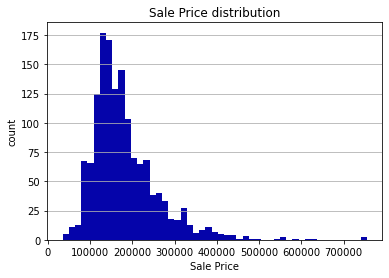

In [ ]:
import matplotlib.pyplot as plt
n, bins, batches  = plt.hist(x= df_train_numeric["SalePrice"], bins="auto", color = '#0504aa')
plt.grid(axis ="y")
plt.xlabel("Sale Price")
plt.ylabel("count")
plt.title("Sale Price distribution")


SalePrice is right skewed, therefore, we need to take the log of the sales. A log transformation would reduce the effect of the outliers and result in a (almost) normaly distributed sales

Text(0.5, 1.0, 'Sale Price distribution')

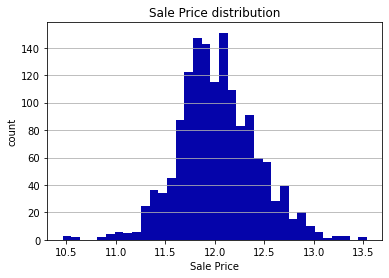

In [ ]:
import matplotlib.pyplot as plt
n, bins, batches  = plt.hist(x= np.log(df_train_numeric["SalePrice"]), bins="auto", color = '#0504aa')
plt.grid(axis ="y")
plt.xlabel("Sale Price")
plt.ylabel("count")
plt.title("Sale Price distribution")


In [ ]:
y_train = np.log(df_train_numeric["SalePrice"] + 1)


In [ ]:
#y_test = np.log(df_test_numeric["SalePrice"] + 1)

In [ ]:
df_train_numeric.drop(columns  = "SalePrice", inplace = True)

In [ ]:
df_train_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1460 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [ ]:
df_test_numeric.drop(columns  = "SalePrice", inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Features Scaling

Using   MinMax  scaler. But are there any outliers?

In [ ]:
x = df_train_numeric


In [ ]:
x_test = df_test_numeric

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_test)
x_test_scaled = scaler.transform(x_test)

In [ ]:
x_scaled

array([[0.00000000e+00, 2.35294118e-01, 3.34198042e-02, ...,
        0.00000000e+00, 9.09090909e-02, 5.00000000e-01],
       [6.85400960e-04, 0.00000000e+00, 3.87950174e-02, ...,
        0.00000000e+00, 3.63636364e-01, 2.50000000e-01],
       [1.37080192e-03, 2.35294118e-01, 4.65072799e-02, ...,
        0.00000000e+00, 7.27272727e-01, 5.00000000e-01],
       ...,
       [9.98629198e-01, 2.94117647e-01, 3.61868705e-02, ...,
        1.61290323e-01, 3.63636364e-01, 1.00000000e+00],
       [9.99314599e-01, 0.00000000e+00, 3.93418869e-02, ...,
        0.00000000e+00, 2.72727273e-01, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.03701886e-02, ...,
        0.00000000e+00, 4.54545455e-01, 5.00000000e-01]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_scaled, y_train, test_size = 0.2)

In [ ]:
x_train.shape[1]

36

# Modeling

In [ ]:
from keras import models, layers, metrics
model = models.Sequential()
model.add(layers.Dense(128, activation = "relu", input_shape = (x_train.shape[1], )))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(1))
model.compile(optimizer = "adam", loss = "mse", metrics = [metrics.RootMeanSquaredError()])

In [ ]:
history  = model.fit(x_train, y_train, epochs = 4000, batch_size = 64, validation_data = (x_val, y_val))

KeyboardInterrupt: 

In [ ]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'root_mean_squared_error', 'val_loss', 'val_root_mean_squared_error'])

# Visualizing val.  loss: does the model overfit?

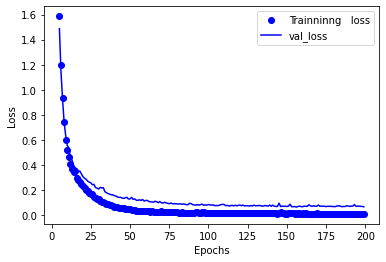

In [ ]:
import matplotlib.pyplot  as  plt
train_loss =     history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(5,200),  train_loss[5:200],  "bo", label = "Trainninng   loss")
plt.plot(range(5,200), val_loss[5:200], "b", label =  "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

val loss started stabilizing from around epoch 100. Zooming in:

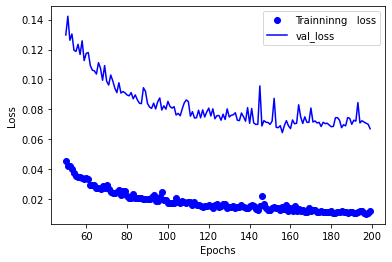

In [ ]:
import matplotlib.pyplot  as  plt
train_loss =     history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(50,200),  train_loss[50:200],  "bo", label = "Trainninng   loss")
plt.plot(range(50,200), val_loss[50:200], "b", label =  "val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Retraining for 100 epochs

In [ ]:
history  = model.fit(x_train, y_train, epochs = 100, batch_size = 64, validation_data = (x_val, y_val))

Epoch 1/100
19/19 [==============================] - 0s 11ms/step - loss: 136.7506 - root_mean_squared_error: 11.6877 - val_loss: 82.9580 - val_root_mean_squared_error: 9.1081
Epoch 2/100
19/19 [==============================] - 0s 5ms/step - loss: 55.8190 - root_mean_squared_error: 7.3931 - val_loss: 9.5080 - val_root_mean_squared_error: 3.0835
Epoch 3/100
19/19 [==============================] - 0s 5ms/step - loss: 8.5380 - root_mean_squared_error: 2.9093 - val_loss: 3.5457 - val_root_mean_squared_error: 1.8830
Epoch 4/100
19/19 [==============================] - 0s 5ms/step - loss: 3.6143 - root_mean_squared_error: 1.8964 - val_loss: 2.8479 - val_root_mean_squared_error: 1.6876
Epoch 5/100
19/19 [==============================] - 0s 4ms/step - loss: 2.4250 - root_mean_squared_error: 1.5550 - val_loss: 1.7418 - val_root_mean_squared_error: 1.3198
Epoch 6/100
19/19 [==============================] - 0s 4ms/step - loss: 1.6190 - root_mean_squared_error: 1.2716 - val_loss: 1.3406 - val_

Epoch 49/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0452 - root_mean_squared_error: 0.2124 - val_loss: 0.0956 - val_root_mean_squared_error: 0.3091
Epoch 50/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0457 - root_mean_squared_error: 0.2137 - val_loss: 0.0944 - val_root_mean_squared_error: 0.3072
Epoch 51/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0441 - root_mean_squared_error: 0.2098 - val_loss: 0.0966 - val_root_mean_squared_error: 0.3109
Epoch 52/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0429 - root_mean_squared_error: 0.2068 - val_loss: 0.0898 - val_root_mean_squared_error: 0.2996
Epoch 53/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0414 - root_mean_squared_error: 0.2035 - val_loss: 0.0883 - val_root_mean_squared_error: 0.2972
Epoch 54/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0385 - root_mean_squared_error: 0.1961 - val_loss: 0.0881 - val_

19/19 [==============================] - 0s 4ms/step - loss: 0.0212 - root_mean_squared_error: 0.1453 - val_loss: 0.0600 - val_root_mean_squared_error: 0.2449
Epoch 97/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0184 - root_mean_squared_error: 0.1351 - val_loss: 0.0617 - val_root_mean_squared_error: 0.2484
Epoch 98/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0177 - root_mean_squared_error: 0.1327 - val_loss: 0.0586 - val_root_mean_squared_error: 0.2420
Epoch 99/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0174 - root_mean_squared_error: 0.1318 - val_loss: 0.0604 - val_root_mean_squared_error: 0.2458
Epoch 100/100
19/19 [==============================] - 0s 4ms/step - loss: 0.0175 - root_mean_squared_error: 0.1322 - val_loss: 0.0621 - val_root_mean_squared_error: 0.2492


val_loss: 0.0621 - val_root_mean_squared_error: 0.2492

After choosing the model, I trained it on the entire train set

In [ ]:
x_train = x_train
y_train    = y_train

In [ ]:
history  = model.fit(x_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0180 - root_mean_squared_error: 0.1342
Epoch 2/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0181 - root_mean_squared_error: 0.1344
Epoch 3/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0175 - root_mean_squared_error: 0.1323
Epoch 4/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0172 - root_mean_squared_error: 0.1313
Epoch 5/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0178 - root_mean_squared_error: 0.1335
Epoch 6/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0182 - root_mean_squared_error: 0.1348
Epoch 7/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0227 - root_mean_squared_error: 0.1507
Epoch 8/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0193 - root_mean_squared_error: 0.1389
Epoch 9/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0181 - root_m

19/19 [==============================] - 0s 2ms/step - loss: 0.0129 - root_mean_squared_error: 0.1135
Epoch 73/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0129 - root_mean_squared_error: 0.1137
Epoch 74/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0155 - root_mean_squared_error: 0.1247
Epoch 75/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0127 - root_mean_squared_error: 0.1125
Epoch 76/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0144 - root_mean_squared_error: 0.1200
Epoch 77/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0142 - root_mean_squared_error: 0.1192
Epoch 78/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0149 - root_mean_squared_error: 0.1221
Epoch 79/100
19/19 [==============================] - 0s 3ms/step - loss: 0.0128 - root_mean_squared_error: 0.1129
Epoch 80/100
19/19 [==============================] - 0s 2ms/step - loss: 0.0143 - root_mean_

In [ ]:
 test_predictions_log= model.predict(x_test_scaled)
 #this returns log(y+ 1) 
test_predictions   = np.exp( test_predictions_log)-1

In [ ]:
pd.DataFrame(test_predictions)

,0
0,211118.468750
1,182205.671875
2,217048.328125
3,117460.875000
4,271604.500000
...,...
1455,172186.812500
1456,207566.656250
1457,266275.218750
1458,119942.093750


In [ ]:
submission = df_test[["Id"]]
submission["SalePrice"] = pd.DataFrame(test_predictions)
submission.set_index('Id', inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
submission

,SalePrice
Id,
1,211118.468750
2,182205.671875
3,217048.328125
4,117460.875000
5,271604.500000
...,...
1456,172186.812500
1457,207566.656250
1458,266275.218750


In [ ]:
submission.to_csv('Predictions_NN.csv')